# Results for Appendix 3

This notebook explores the expected time to first coalescence of an ancient lineage into a modern panel. We explore two particular approximations for this to make claims on the scales for haplotype copying. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../../src/')
from first_coal_anc_samples import *

%matplotlib inline

In [2]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['figure.facecolor'] = "w"
plt.rcParams['figure.autolayout'] = True

# Deboxing a particular axis
def debox(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

from tqdm import tqdm

100%|██████████| 20/20 [00:46<00:00,  2.30s/it]


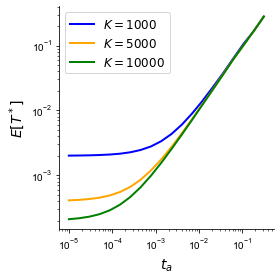

In [3]:
nt = 20
tas = 10**np.linspace(-5,-0.5, nt)

# Reference Panel Size and colors for points...
Ks = [1000, 5000, 10000]
colors = ['blue','orange', 'green']

f, ax = plt.subplots(1,1,figsize=(4,4))
for i in range(len(Ks)):
    e_t = np.zeros(nt)
    for j in tqdm(range(nt)):
        t = tas[j]
        # calculating the time to the first coalescent using griffiths approximation
        e_t[j] = time_first_coal_griffiths(Ks[i],t)
        
    ax.loglog(tas, e_t, lw=2, color=colors[i], label=r'$K = %d$' % Ks[i])
    
ax.legend(fontsize=12)
ax.set_xlabel(r'$t_a$', fontsize=14);
ax.set_ylabel(r'$E[T^*]$', fontsize=14);
debox(ax);

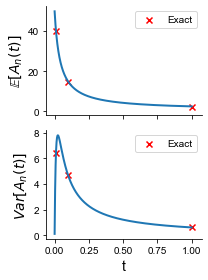

In [4]:
# Testing asymptotic calculations against exact values from Griffiths 1984 (Table 1)
nt = 100
Ne = 1e4
gens = np.arange(1,10000)
tas = gens/Ne
K = 50
e_nt_asymptotic = np.array([appx_num_lineages_mean_var(K,t)[0] for t in tas])
var_nt_asymptotic = np.array([appx_num_lineages_mean_var(K,t)[1] for t in tas])

fig, ax = plt.subplots(2,1,figsize=(3, 2*2), sharex=True)
ax[0].plot(tas, e_nt_asymptotic, lw=2)
# ax[0].set_xlabel(r't', fontsize=14)
ax[0].scatter(0.01, 40.161, color='red', marker='x')
ax[0].scatter(0.1,14.61, color='red', marker='x')
ax[0].scatter(1.0,2.289, color='red', marker='x', label=r'Exact')
ax[0].set_ylabel(r'$\mathbb{E}[A_n(t)]$',fontsize=14)
ax[0].legend()

ax[1].plot(tas, var_nt_asymptotic, lw=2)
ax[1].scatter(0.01,6.443, color='red', marker='x',label=r'Exact')
ax[1].scatter(0.1, 4.668, color='red', marker='x')
ax[1].scatter(1.0, 0.643, color='red', marker='x')
ax[1].set_ylabel(r'$Var[A_n(t)]$',fontsize=14)
ax[1].set_xlabel(r't',fontsize=14)
ax[1].legend()

debox(ax[0]); debox(ax[1]);
fig.tight_layout();

 22%|██▏       | 67/300 [00:00<00:00, 328.18it/s]

CPU times: user 9.62 s, sys: 166 ms, total: 9.79 s
Wall time: 10.1 s


100%|██████████| 300/300 [00:00<00:00, 546.54it/s]


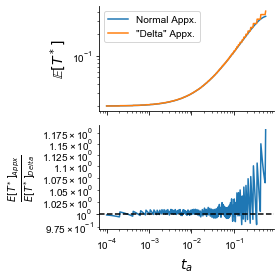

In [5]:
# Checking using our expectation/rounding operator vs. our full asymptotic distribution argument
nt = 300
tas = np.logspace(-4,-0.25, nt)
k = 100

fig, ax = plt.subplots(2,1,figsize=(4,2*2), sharex=True)

#compute the full expectation
%time e_Ti = np.array([full_approx_time_to_first_coal(k,t,eps=30)[3] for t in tqdm(tas)])
e_Ti_griffiths = np.array([time_first_coal_griffiths(k,t) for t in tqdm(tas)])
ax[0].loglog(tas, e_Ti, label='Normal Appx.')
ax[0].loglog(tas, e_Ti_griffiths, label=r'"Delta" Appx.')
ax[1].plot(tas, e_Ti_griffiths/e_Ti)


ax[0].legend(fontsize=10)
ax[0].set_ylabel(r'$\mathbb{E}[T^*]$', fontsize=14)
ax[1].set_xlabel(r'$t_a$', fontsize=14)
ax[1].set_ylabel(r'$\frac{E[T^*]_{Appx}}{E[T^*]_{Delta}}$', fontsize=14)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].axhline(y=1.0, linestyle='--', color='black')
debox(ax[0]); debox(ax[1]);
fig.tight_layout();

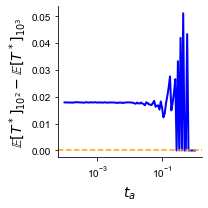

In [6]:
# Estimating at what time point is the expected time to the first coalescent equal between 1000 and 10000 samples

def time_diff(k1,k2,t):
    return(time_first_coal_griffiths(k1,t) - time_first_coal_griffiths(k2,t))

def time_diff_full(k1,k2,t,eps=2):
    return(full_approx_time_to_first_coal(k1,t,eps=eps)[3] - full_approx_time_to_first_coal(k2,t,eps=eps)[3])

# optt = fsolve(lambda t: time_diff_full(1000,10000,t), 0.01,)
# print('Approximate time to 'optt[0])

nt = 100
tas = np.logspace(-4,0,nt)

diffs = np.array([time_diff(100,1000,t) for t in tas])
fig, ax = plt.subplots(1,1,figsize=(3,3))
ax.plot(tas, diffs, lw=2,color='blue')
ax.axhline(y=0, linestyle='--', color='orange')
ax.set_xscale('log')
ax.set_xlabel(r'$t_a$', fontsize=14)
ax.set_ylabel(r'$\mathbb{E}[T^*]_{10^2} - \mathbb{E}[T^*]_{10^3}$', fontsize=14)
debox(ax);
fig.tight_layout();